<hr style="border:1px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> FUNDAMENTOS MATEMATICOS PARA INTELIGENCIA ARTIFICIAL</h1></center> 
<center><h1 style="color:#173F8A;"> IMT 3850, 2023 </h1></center>
<hr style="border:1px solid #FEC60D"> </hr>
<center><h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br></h3></center>
<h3 style="color:#03122E;text-align:right;"> Magister en Ingenieria Artificial - MIA <br> Instituto de Ingenieria Matematica y Computacional - IMC<br>  Pontificia Universidad Catolica de Chile<br>   </h3>




<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->



<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Probabilidad para IA</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>

<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Ejemplo:-Quicksort" data-toc-modified-id="Ejemplo:-Quicksort">Ejemplo: Quicksort
                </a>
            </span>
        </li>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Ejemplo:-Bivariate-normal" data-toc-modified-id="Ejemplo:-Bivariate-normal">Ejemplo: Bivariate normal
                </a>
            </span>
        </li>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Ejemplo:-reduccion-dimensionalidad" data-toc-modified-id="Ejemplo:-reduccion-dimensionalidad">Ejemplo: reduccion dimensionalidad
                </a>
            </span>
        </li>
    </ul>
</div>



In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Ejemplo: Quicksort

In [18]:
def Quicksort(Sinput):
    S = Sinput.copy()
    if len(S) == 1 or not S:
        return S
    else:
        # choose pivot
        ix = np.random.choice(range(0, len(S)))
        x = S[ix]
        S1 = []
        S2 = []
        S.remove(x)
        for item in S:
            if item<x:
                S1.append(item)
            else:
                S2.append(item)
        S1 = Quicksort(S1)
        S2 = Quicksort(S2)
        
        return S1+[x]+S2

In [17]:
# Ejemplo Lista numeros aleatorios
S = np.random.rand(6).tolist()
print(S)
S_sorted = Quicksort(S)
print(S_sorted)

[0.3150987948341961, 0.6793548866935788, 0.5101340617761844, 0.013169274333232006, 0.9621080048987456, 0.5581183085966727]
[0.013169274333232006, 0.3150987948341961, 0.5101340617761844, 0.5581183085966727, 0.6793548866935788, 0.9621080048987456]


In [19]:
def Quicksort_count_comparison(Sinput):
    S = Sinput.copy()
    if len(S) == 1 or not S:
        return S, 0
    else:
        # choose pivot
        ix = np.random.choice(range(0, len(S)))
        x = S[ix]
        S1 = []
        S2 = []
        S.remove(x)
        for item in S:
            if item<x:
                S1.append(item)
            else:
                S2.append(item)
        count = len(S)
        S1, count1 = Quicksort_count_comparison(S1)
        S2, count2 = Quicksort_count_comparison(S2)
        count += count1+count2
        return S1+[x]+S2, count

In [22]:
# Ejemplo lista aleatoria y contar
S = np.random.rand(6).tolist()
S_sorted, count_comparisons = Quicksort_count_comparison(S)
print(S)
print(S_sorted)
print(count_comparisons)

[0.6960099480357363, 0.8094923229076376, 0.12761407086216325, 0.7266362143898724, 0.04705665579170559, 0.5733430235748227]
[0.04705665579170559, 0.12761407086216325, 0.5733430235748227, 0.6960099480357363, 0.7266362143898724, 0.8094923229076376]
9


In [23]:
n = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
cc = []
N = 100
for ni in n:
    cc_i =0
    for j in range(N):
        S = np.random.rand(ni).tolist()
        Ssorted, count_comparisons_j = Quicksort_count_comparison(S)
        cc_i += count_comparisons_j
    cc.append(cc_i/N)

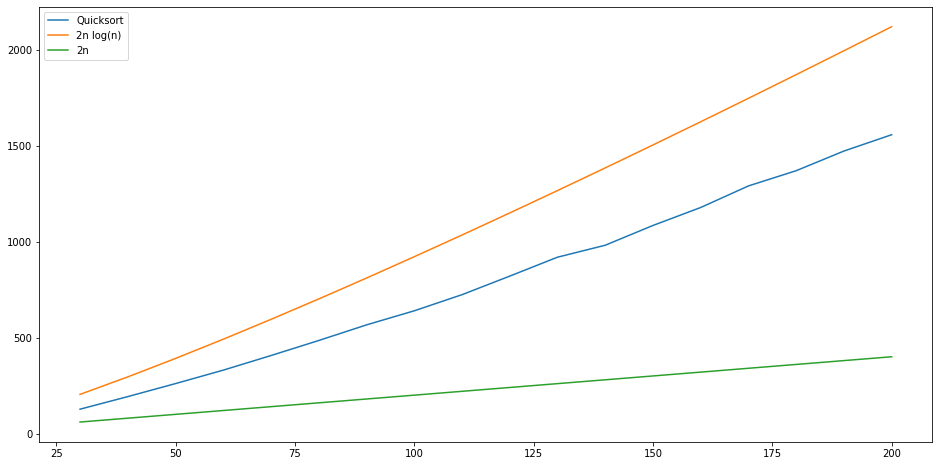

In [24]:
plt.plot(n, cc, label='Quicksort')
plt.plot(n, 2*np.asarray(n)*np.log(np.asarray(n)), 'C01', label='2n log(n)')
plt.plot(n, 2*np.asarray(n), 'C02', label='2n')
plt.legend()
plt.show()

## Ejemplo: Randomized median algorithm

In [25]:
def RandomizedMedianAlgorithm(Sinput):
    S = Sinput.copy()
    n = len(S)
    n34 = n**(3/4)
    n12 = np.sqrt(n)
    print(n, n34, n12)
    n1 = int(np.ceil(n34))

    R = sample(S, n1)
    print("len(R):", len(R))
    R = Quicksort(R)
    #print(R)
    di = int(np.floor(0.5*n34-n12))
    ui = int(np.ceil(0.5*n34+n12)-1)
    print("di:", di, "ui:", ui)
    d = R[di]
    u = R[ui]
    print("d:", d, "u:",u)
    C = []
    elld = 0
    ellu = 0
    for x in S:
        if x<d:
            elld += 1
        elif x>u:
            ellu += 1
        else:
            C.append(x)
    print("elld:", elld)
    print("ellu:", ellu)
    print("|C|: ", len(C), 4*n34)
    if elld>n/2 or ellu>n/2:
        return False
    if len(C) <= 4*n34:
        C = Quicksort(C)
        m = int(np.floor(n/2)) - elld   # or -1 in python
        return C[m]
    else:
        return False

In [26]:
from random import sample
NS = 21
S = np.random.rand(NS).tolist()

print(len(S))
Ssorted = Quicksort(S)
print(Ssorted[int((NS-1)/2)])
#S = [0,2,5,1,4,7,9,6,8,11,15,13,12,14, 18, 19,20, 16, 17]

21
0.4124071733349989


In [30]:
answer = True
iter = 0
NS = 201
#S = np.random.rand(NS).tolist()
S = np.arange(NS).tolist()
while answer is not False and iter<1000:
    
    
    answer = RandomizedMedianAlgorithm(S)
    print("*** iter:", iter, ", answer:", answer)
    iter += 1

201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 41 u: 150
elld: 41
ellu: 50
|C|:  110 213.52908270791866
*** iter: 0 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 38 u: 158
elld: 38
ellu: 42
|C|:  121 213.52908270791866
*** iter: 1 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 61 u: 150
elld: 61
ellu: 50
|C|:  90 213.52908270791866
*** iter: 2 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 43 u: 160
elld: 43
ellu: 40
|C|:  118 213.52908270791866
*** iter: 3 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 52 u: 154
elld: 52
ellu: 46
|C|:  103 213.52908270791866
*** iter: 4 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 42 u: 148
elld: 42
ellu: 52
|C|:  107 213.52908270791866
*** iter: 5 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 41 u: 149
ell

*** iter: 260 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 31 u: 157
elld: 31
ellu: 43
|C|:  127 213.52908270791866
*** iter: 261 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 48 u: 146
elld: 48
ellu: 54
|C|:  99 213.52908270791866
*** iter: 262 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 48 u: 165
elld: 48
ellu: 35
|C|:  118 213.52908270791866
*** iter: 263 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 43 u: 150
elld: 43
ellu: 50
|C|:  108 213.52908270791866
*** iter: 264 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 47 u: 152
elld: 47
ellu: 48
|C|:  106 213.52908270791866
*** iter: 265 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 51 u: 149
elld: 51
ellu: 51
|C|:  99 213.52908270791866
*** iter: 266 , answer: 100
201 53.382270676979665 14.177446878757825
le

*** iter: 422 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 27 u: 138
elld: 27
ellu: 62
|C|:  112 213.52908270791866
*** iter: 423 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 38 u: 117
elld: 38
ellu: 83
|C|:  80 213.52908270791866
*** iter: 424 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 44 u: 151
elld: 44
ellu: 49
|C|:  108 213.52908270791866
*** iter: 425 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 38 u: 142
elld: 38
ellu: 58
|C|:  105 213.52908270791866
*** iter: 426 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 53 u: 139
elld: 53
ellu: 61
|C|:  87 213.52908270791866
*** iter: 427 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 46 u: 149
elld: 46
ellu: 51
|C|:  104 213.52908270791866
*** iter: 428 , answer: 100
201 53.382270676979665 14.177446878757825
le

*** iter: 558 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 35 u: 136
elld: 35
ellu: 64
|C|:  102 213.52908270791866
*** iter: 559 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 50 u: 171
elld: 50
ellu: 29
|C|:  122 213.52908270791866
*** iter: 560 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 50 u: 148
elld: 50
ellu: 52
|C|:  99 213.52908270791866
*** iter: 561 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 40 u: 152
elld: 40
ellu: 48
|C|:  113 213.52908270791866
*** iter: 562 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 35 u: 155
elld: 35
ellu: 45
|C|:  121 213.52908270791866
*** iter: 563 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 39 u: 150
elld: 39
ellu: 50
|C|:  112 213.52908270791866
*** iter: 564 , answer: 100
201 53.382270676979665 14.177446878757825
l

di: 12 ui: 40
d: 39 u: 139
elld: 39
ellu: 61
|C|:  101 213.52908270791866
*** iter: 799 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 59 u: 169
elld: 59
ellu: 31
|C|:  111 213.52908270791866
*** iter: 800 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 44 u: 138
elld: 44
ellu: 62
|C|:  95 213.52908270791866
*** iter: 801 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 44 u: 154
elld: 44
ellu: 46
|C|:  111 213.52908270791866
*** iter: 802 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 53 u: 159
elld: 53
ellu: 41
|C|:  107 213.52908270791866
*** iter: 803 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 38 u: 160
elld: 38
ellu: 40
|C|:  123 213.52908270791866
*** iter: 804 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 49 u: 151
elld: 49
ellu: 49
|C|:  103 213.529082707918

*** iter: 926 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 33 u: 143
elld: 33
ellu: 57
|C|:  111 213.52908270791866
*** iter: 927 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 54 u: 143
elld: 54
ellu: 57
|C|:  90 213.52908270791866
*** iter: 928 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 51 u: 138
elld: 51
ellu: 62
|C|:  88 213.52908270791866
*** iter: 929 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 52 u: 136
elld: 52
ellu: 64
|C|:  85 213.52908270791866
*** iter: 930 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 49 u: 148
elld: 49
ellu: 52
|C|:  100 213.52908270791866
*** iter: 931 , answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 58 u: 153
elld: 58
ellu: 47
|C|:  96 213.52908270791866
*** iter: 932 , answer: 100
201 53.382270676979665 14.177446878757825
len(

## Ejemplo: Bivariate normal

In [7]:
import numpy as np
from scipy.stats import multivariate_normal

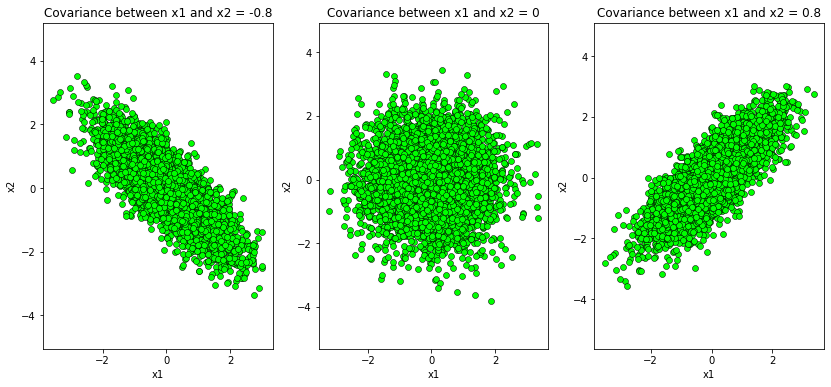

In [10]:
# Ilustracion de la covarianza entre dos variables

plt.rcParams['figure.figsize']=14,6
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Setting mean of the distributino to
# be at (0,0)
mean = np.array([0,0])
 
# Iterating over different covariance
# values
for idx, val in enumerate(cov_val):
    plt.subplot(1,3,idx+1)
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating 5000 samples out of the
    # distribution
    data = distr.rvs(size = 5000)
     
    # Plotting the generated samples
    plt.plot(data[:,0],data[:,1], 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
    plt.title(f'Covariance between x1 and x2 = {val}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')
     
plt.show()

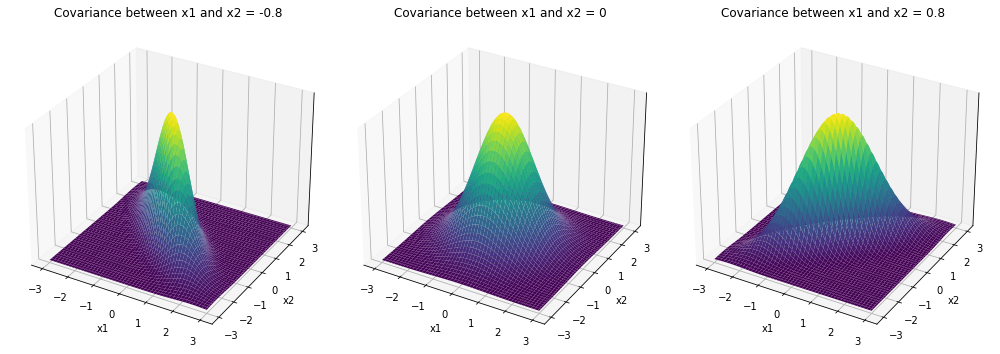

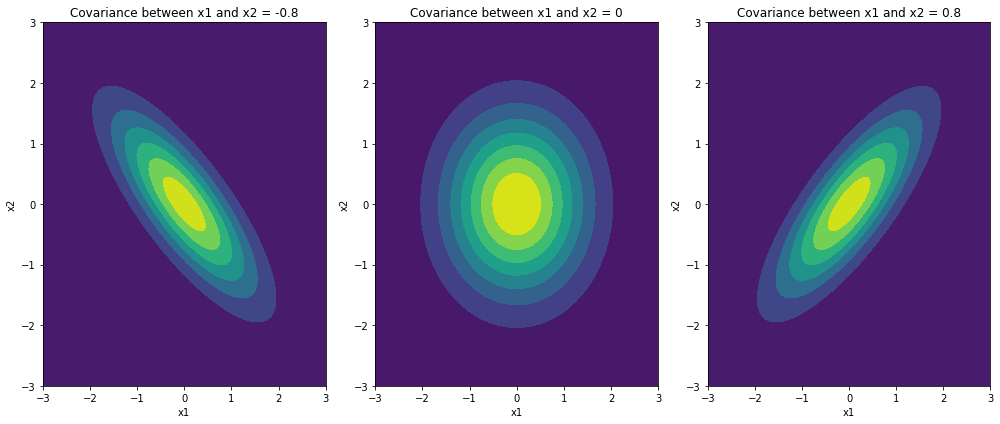

In [11]:
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])
 
# Storing density function values for
# further analysis
pdf_list = []
 
# Iterating over different covariance values
for idx, val in enumerate(cov_val):
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating a meshgrid complacent with
    # the 3-sigma boundary
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    # Plotting the density function values
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])
 
plt.tight_layout()
plt.show()
 
# Plotting contour plots
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()

## Ejemplo: reduccion dimensionalidad

El proposito de de alguna forma reducir las dimensiones de las columnas de la matriz de datos $X$ a solo columnas que tienen una importancia para la tarea de aprendizaje de maquina. El analisos de componente principal (PCA) consiste en tmar la matrix $X$ como input y:
1. substraer su media, 
2. calcular la matriz de covarianza,
3. calcular la descomposicion de valores propios de la matriz de covarianza.


In [2]:
from sklearn import decomposition
import numpy as np
pca = decomposition.PCA()

*** Resultados de PCA:
Percentage of variance explained by each of the selected components:
 [1.00000000e+00 4.44789028e-32 6.56191018e-33]
sin vals  [5.66294672e+00 1.19431671e-15 4.58730500e-16]
*** Resultados de SVD:
Sig: [5.66294672e+00 1.19431671e-15 4.58730500e-16]
Sig^2: [3.20689655e+01 1.42639240e-30 2.10433671e-31]
*** Resultados de EIG:
Sig^2: [ 3.20689655e+01  3.96491872e-15 -2.18856188e-15]


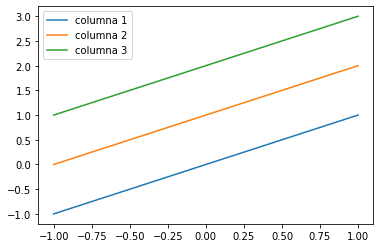

In [3]:
# Create data
N = 30
x = np.linspace(-1,1,N)
X = np.c_[x,x+1,x+2] 
pca.fit(X)

print('*** Resultados de PCA:')
print("Percentage of variance explained by each of the selected components:\n", pca.explained_variance_ratio_)
print("sin vals ", pca.singular_values_)
Xavg = np.mean(X, axis=0)

# 1. sustraer media
B = X - np.tile(Xavg,(N,1))

# 2. Calcular matriz de Covarianza muestreada
S = B.T.dot(B)
U, Sig, VT = np.linalg.svd(B, full_matrices = 0)
print('*** Resultados de SVD:')
print("Sig:", Sig)
print("Sig^2:", Sig*Sig)
# 3. 
lamb, v = np.linalg.eigh(S)
print('*** Resultados de EIG:')
print("Sig^2:", np.flip(lamb))
plt.rcParams['figure.figsize']=8,6
plt.plot(x,X[:,0],label='columna 1')
plt.plot(x,X[:,1],label='columna 2')
plt.plot(x,X[:,2],label='columna 3')
plt.legend()
plt.show()

In [26]:
# segundo ejemplo
X = np.c_[x, 2*x+1, 3*x+2, 4*x]
pca.fit(X)
print(pca.explained_variance_ratio_)
print("sin vals ", pca.singular_values_)

[1.00000000e+00 3.06655395e-32 1.27799345e-33 2.19916511e-34]
sin vals  [1.79078099e+01 3.13594025e-15 6.40186910e-16 2.65565341e-16]


In [28]:
# tercer ejemplo
X = np.c_[np.sin(2*np.pi*x), 2*np.sin(2*np.pi*x)+1, 3*np.sin(2*np.pi*x)+2]
pca.fit(X)
print(pca.explained_variance_ratio_)
print("sin vals ", pca.singular_values_)

[1.00000000e+00 4.22855533e-32 5.59334004e-33]
sin vals  [1.42478068e+01 2.92984084e-15 1.06557404e-15]


## Ejemplo: toy problem

Revisitado

(2, 10000)
*** Resultados de SVD:
S: [1.99615804 0.49205176] varianza en cada una de las direcciones
*** Resultados de EIG:
Valores singulares: [0.49205176 1.99615804]
Eigenvalues: [0.24211493 3.98464693]


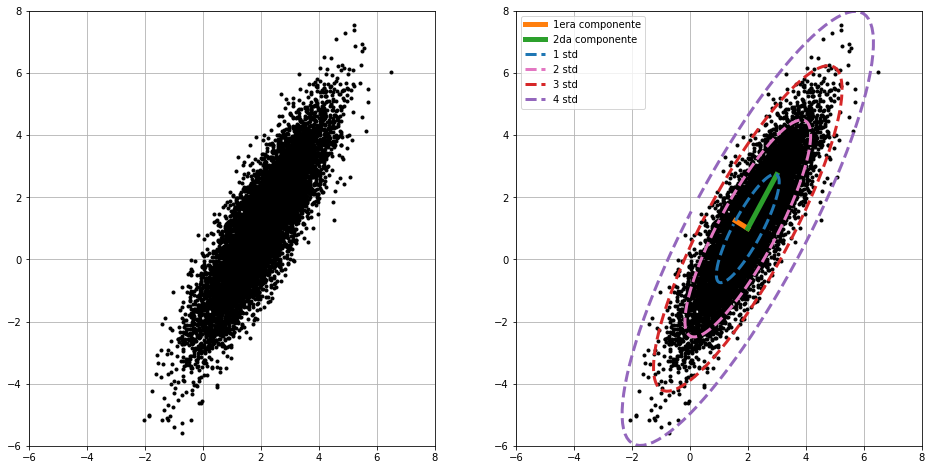

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16,8]

xC = np.array([2.0,1.0]) # Este es el centro de nuestros datos o el promedio
sig = np.array([2.0,0.5]) # ejes principales



# Rotacion en angulo theta
theta = np.pi/3.0
c = np.cos(theta); s = np.sin(theta)
R = np.array([[c,-s],[s,c]])

nPoints = 10000

X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))
print(X.shape)
# stretch los puntos, los rotamos en el angulo theta y los centramos en xC

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:], X[1,:], '.', color = 'k')
ax1.grid()
plt.xlim((-6,8))
plt.ylim((-6,8))



# 1. substraer media
Xavg = np.mean(X, axis=1)
B = X.T - np.tile(Xavg,(nPoints,1))

# 2. Calcular matriz de covarianza
SV =  B.T.dot(B)/(nPoints)
U, S, VT = np.linalg.svd((1.0/np.sqrt(nPoints))*B, full_matrices = 0)
print('*** Resultados de SVD:')
print('S:', S, 'varianza en cada una de las direcciones')
#print('u1:', U[:,0])
#print('u2:', U[:,1])

# 3. Calcular EIG
lamb, V = np.linalg.eigh(SV)

Sig =np.sqrt(lamb)
print('*** Resultados de EIG:')
print("Valores singulares:", Sig)
print("Eigenvalues:", lamb)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

phi = 2 * np.pi * np.arange(0,1,0.01)

# Intervalos de confianza
# 1-std confidence interval
Xstd = V @ np.diag(Sig) @ np.array([np.cos(phi),np.sin(phi)])

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+V[0,0]*Sig[0]]),
         np.array([Xavg[1], Xavg[1]+V[1,0]*Sig[0]]),'-',color='C01',linewidth=5, label='1era componente')
ax2.plot(np.array([Xavg[0], Xavg[0]+V[0,1]*Sig[1]]),
         np.array([Xavg[1], Xavg[1]+V[1,1]*Sig[1]]),'-',color='C02',linewidth=5, label='2da componente')

ax2.plot(Xavg[0] + 1*Xstd[0,:], Xavg[1] + 1*Xstd[1,:],'--',color='C0',  linewidth=3, label='1 std')
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'--',color='C06',linewidth=3, label='2 std')
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'--',color='C03',linewidth=3, label='3 std')
ax2.plot(Xavg[0] + 4*Xstd[0,:], Xavg[1] + 4*Xstd[1,:],'--',color='C04',linewidth=3, label='4 std')
ax2.legend()

plt.show()